In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
img_bgr = cv2.imread("C:/Users/akihiro.tanaka.CORP/Downloads/pictures/penguins1.jpg")
h, w = img_bgr.shape[:2]
scale = (640 * 480 / (w * h)) ** 0.8
img_bgr_resize = cv2.resize(img_bgr, dsize=None, fx=scale, fy=scale)
img_rgb = cv2.cvtColor(img_bgr_resize, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr_resize, cv2.COLOR_BGR2GRAY)

# 8-1 線形変換
## 8-1-1 線形変換の一般形
---
座標$(x,y)$の位置の点が、変換により座標$(x',y')$に移動するとする。  
そのとき、以下の式で表される変換を**線形変換**と呼ぶ。
$$
    \left[\begin{array}{c}
    x'\\
    y'
    \end{array}\right] =
    \left[\begin{array}{cc}
    a&b\\
    c&d
    \end{array}\right]
    \left[\begin{array}{c}
    x\\
    y
    \end{array}\right]
$$

## 8-1-2 拡大・縮小
---
**拡大・縮小**は、以下の式で表される。
$$
    \left[\begin{array}{c}
    x'\\
    y'
    \end{array}\right] =
    \left[\begin{array}{cc}
    s_{x}&0\\
    0&s_{y}
    \end{array}\right]
    \left[\begin{array}{c}
    x\\
    y
    \end{array}\right]
$$
ここで$s_{x},s_{y}$はx方向、y方向の拡大（縮小）率である。

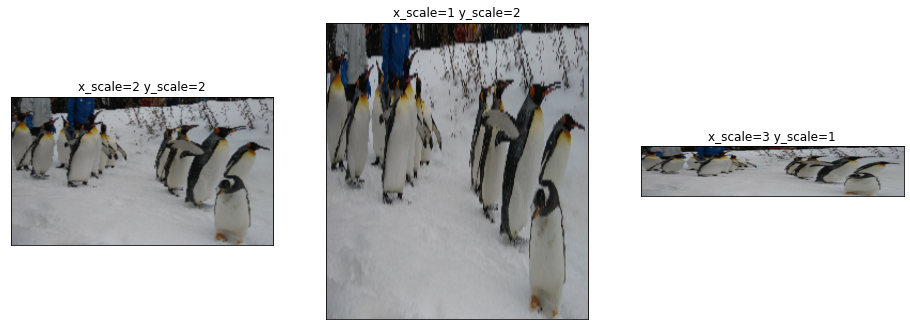

In [4]:
x1 = img_rgb.shape[1]
x2 = img_rgb.shape[0]

x_scale = [2,1,3]
y_scale = [2,2,1]

fig, ax = plt.subplots(1, 3, figsize=(16, 9))
for i in range(3):
    dst = cv2.resize(img_rgb, (x1*x_scale[i], x2*y_scale[i]))
    ax[i].imshow(dst)
    ax[i].set_title('x_scale={} y_scale={}'.format(str(x_scale[i]), str(y_scale[i])))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

## 8-1-3 回転
---
原点を中心に、反時計回りに角度$\theta$だけ**回転**する変換は、以下の式で表される。
$$
    \left[\begin{array}{c}
    x'\\
    y'
    \end{array}\right] =
    \left[\begin{array}{cc}
    \cos{\theta}&-\sin{\theta}\\
    \sin{\theta}&\cos{\theta}
    \end{array}\right]
    \left[\begin{array}{c}
    x\\
    y
    \end{array}\right]
$$
ここでは、画像の左下を中心に回転した例を示す。

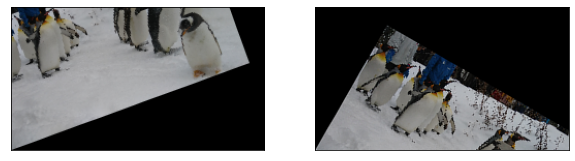

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

center = (0, x2)
affine_trans = cv2.getRotationMatrix2D(center, 20.0, 1.0)
dst = cv2.warpAffine(img_rgb, affine_trans, (x1, x2))
ax[0].imshow(dst);
ax[0].set_xticks([]);
ax[0].set_yticks([]);

affine_trans = cv2.getRotationMatrix2D(center, -30.0, 1.0)
dst = cv2.warpAffine(img_rgb, affine_trans, (x1, x2), flags=cv2.INTER_CUBIC)
ax[1].imshow(dst);
ax[1].set_xticks([]);
ax[1].set_yticks([]);

## 8-1-4 鏡映
---
ある直線に対して、対象な位置に反転する変換を**鏡映**と呼ぶ。  
x軸に関する変換
$$
    \left[\begin{array}{c}
    x'\\
    y'
    \end{array}\right] =
    \left[\begin{array}{cc}
    1&0\\
    0&-1
    \end{array}\right]
    \left[\begin{array}{c}
    x\\
    y
    \end{array}\right]
$$
y軸に関する変換
$$
    \left[\begin{array}{c}
    x'\\
    y'
    \end{array}\right] =
    \left[\begin{array}{cc}
    -1&0\\
    0&1
    \end{array}\right]
    \left[\begin{array}{c}
    x\\
    y
    \end{array}\right]
$$
直線y=xに関する変換
$$
    \left[\begin{array}{c}
    x'\\
    y'
    \end{array}\right] =
    \left[\begin{array}{cc}
    0&1\\
    1&0
    \end{array}\right]
    \left[\begin{array}{c}
    x\\
    y
    \end{array}\right]
$$

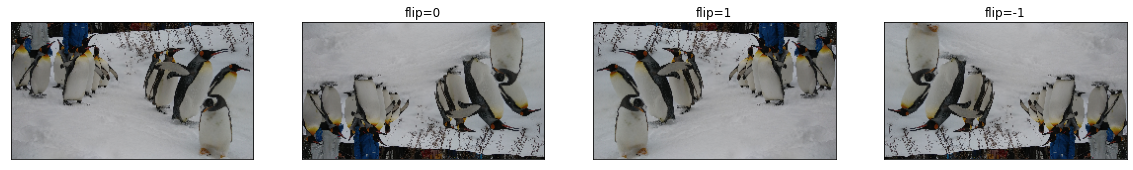

In [18]:
width = img_rgb.shape[1]
height = img_rgb.shape[0]

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

center = (int(width/2), int(height/2))
ax[0].imshow(img_rgb)
ax[0].set_xticks([])
ax[0].set_yticks([])

flip_n = [0, 1, -1]

for i in range(1,4):
    dst = cv2.flip(img_rgb, flip_n[i-1])
    ax[i].imshow(dst)
    ax[i].set_title('flip={}'.format(str(flip_n[i-1])))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

## 8-1-5 スキュー
---
長方形を傾けて平行四辺形にするような変換を**スキュー**または**せん断**と呼ぶ。  
x軸方向へのスキューは以下の式で表される。
$$
    \left[\begin{array}{c}
    x'\\
    y'
    \end{array}\right] =
    \left[\begin{array}{cc}
    1&b\\
    0&1
    \end{array}\right]
    \left[\begin{array}{c}
    x\\
    y
    \end{array}\right]
$$
傾ける角度を$\theta$とすると、$b=\tan{\theta}$の関係がある。  
また、y軸方向へのスキューは以下の式で表される。
$$
    \left[\begin{array}{c}
    x'\\
    y'
    \end{array}\right] =
    \left[\begin{array}{cc}
    1&0\\
    c&1
    \end{array}\right]
    \left[\begin{array}{c}
    x\\
    y
    \end{array}\right]
$$
傾ける角度を$\theta$とすると、$c=\tan{\theta}$の関係がある。

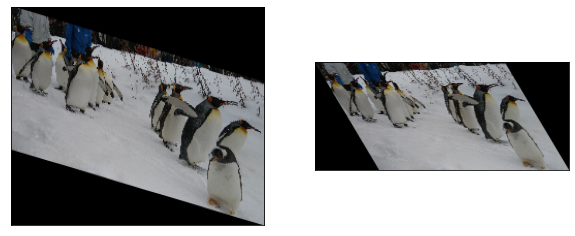

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

mat = np.array([[1, 0, 0], [0.3, 1, 0]], dtype=np.float32)
dst = cv2.warpAffine(img_rgb, mat, (width, int(height + width * 0.3)))
ax[0].imshow(dst);
ax[0].set_xticks([]);
ax[0].set_yticks([]);

mat = np.array([[1, 0.6, 0], [0, 1, 0]], dtype=np.float32)
dst = cv2.warpAffine(img_rgb, mat, (int(width + height * 0.6), height))
ax[1].imshow(dst);
ax[1].set_xticks([]);
ax[1].set_yticks([]);

## 8-1-6 合成変換
---
ここまでに示した各種変換は、ベクトルと行列を記号で置き換えることで、以下のように表される。
$$
    \boldsymbol{x'}=\boldsymbol{A}\boldsymbol{x}
$$
ここで、
$$
    \boldsymbol{x}=
    \left[\begin{array}{c}
    x\\
    y
    \end{array}\right],
    \boldsymbol{x'}=
    \left[\begin{array}{c}
    x'\\
    y'
    \end{array}\right],
    \boldsymbol{A}=
    \left[\begin{array}{cc}
    a&b\\
    c&d
    \end{array}\right]
$$
線形変換は2×2の行列$\boldsymbol{A}$で表現される。  
座標$x$が変換$\boldsymbol{A}$により、座標$\boldsymbol{x'}$に移ったとすると以下のように表される。
$$
    \boldsymbol{x'}=\boldsymbol{A}\boldsymbol{x}
$$
さらに、座標$\boldsymbol{x'}$が、変換$\boldsymbol{B}$により座標$\boldsymbol{x''}$に移ったとすると、以下のように表される。
$$
    \boldsymbol{x''}=\boldsymbol{B}\boldsymbol{x'}
$$
以下の式が導かれる。
$$
    \boldsymbol{x''}=(\boldsymbol{BA})\boldsymbol{x}=\boldsymbol{Cx}
$$
ここで、$\boldsymbol{C}$は$\boldsymbol{C}=\boldsymbol{BA}$なる2×2行列であり、これも1つの線形変換を表すことになる。  
任意の線形変換の組み合わせは、やはり線形変換となる。  
一般に、個々の順番を入れ替えると、結果が異なることに注意する。

# 8-2 同次座標とアフィン変換・射影変換
## 8-2-1 平行移動
---
x軸方向の移動量$t_{x}$、y軸方向の移動量を$t_{y}$としたとき、この**平行移動**は以下の式で表される。
$$
    x'=x+t_{x}\\
    y'=y+t_{y}
$$
単純なものであるが、線形変換の一般系で表現することはできない。

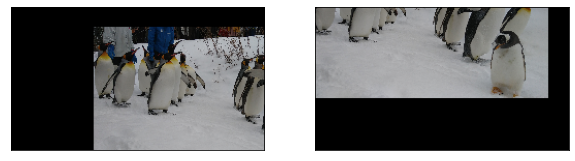

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

mat = np.array([[1, 0, 80], [0, 1, 20]], dtype=np.float32)
dst = cv2.warpAffine(img_rgb, mat, (width, height))
ax[0].imshow(dst);
ax[0].set_xticks([]);
ax[0].set_yticks([]);

mat = np.array([[1, 0, -20], [0, 1, -50]], dtype=np.float32)
dst = cv2.warpAffine(img_rgb, mat, (width, height))
ax[1].imshow(dst);
ax[1].set_xticks([]);
ax[1].set_yticks([]);

## 8-2-2 同次座標
---
座標$(x,y)$に対し、要素を1つ増やした座標$(\xi_{1},\xi_{2},\xi_{3})$を、以下の関係式を満たすように定義する。
$$
    x=\frac{\xi_{1}}{\xi_{3}}\\
    y=\frac{\xi_{2}}{\xi_{3}}
$$
ただし、$\xi_{1},\xi_{2},\xi_{3}$の少なくとも1つは0でないとする。  
このように定義される座標を**同次座標**と呼ぶ。  
同次座標において、$\lambda\neq0$となる任意の$\lambda$に対し、$(\lambda\xi_{1},\xi_{2},\lambda\xi_{3})$と$(\xi_{1},\lambda\xi_{2},\xi_{3})$は,
通常の座標に直したとき、ともに$(\frac{\xi_{1}}{\xi_{3}},\frac{\xi_{2}}{\xi_{3}})$となる。  
同次座標系においては、定数倍をしても変わらないとみなせる。  
このような関係を**同値**であると呼び、以下のように表す。
$$
    \left[\begin{array}{c}
    \xi_{1}\\
    \xi_{2}\\
    \xi_{3}
    \end{array}\right] \sim
    \left[\begin{array}{c}
    \lambda\xi_{1}\\
    \lambda\xi_{2}\\
    \lambda\xi_{3}
    \end{array}\right]
$$
ベクトル表記では、頭に~を付けて表す。
$$\boldsymbol{\tilde{\xi}}\sim\lambda\boldsymbol{\tilde{\xi}}$$

## 8-2-3 アフィン変換
---
同次座標を利用すると、平行移動は以下の式のように表すことができる。
$$
    \left[\begin{array}{c}
    x'\\
    y'\\
    1
    \end{array}\right] \sim
    \left[\begin{array}{ccc}
    1&0&t_{x}\\
    0&1&t_{y}\\
    0&0&1
    \end{array}\right]
    \left[\begin{array}{c}
    x\\
    y\\
    1
    \end{array}\right]
$$
また、線形変換は、同次座標を用いると以下のように表現される。
$$
    \left[\begin{array}{c}
    x'\\
    y'\\
    1
    \end{array}\right] \sim
    \left[\begin{array}{ccc}
    a&b&0\\
    c&d&0\\
    0&0&1
    \end{array}\right]
    \left[\begin{array}{c}
    x\\
    y\\
    1
    \end{array}\right]
$$
さらに、任意の線形変換と平行移動を組み合わせた変換を**アフィン変換**と呼ぶ。  
アフィン変換の一般系は以下のように求めることができる。
$$
    \left[\begin{array}{ccc}
    1&0&t_{x}\\
    0&1&t_{y}\\
    0&0&1
    \end{array}\right]
    \left[\begin{array}{ccc}
    a&b&0\\
    c&d&0\\
    0&0&1
    \end{array}\right] \sim
    \left[\begin{array}{ccc}
    a&b&t_{x}\\
    c&d&t_{y}\\
    0&0&1
    \end{array}\right]
$$

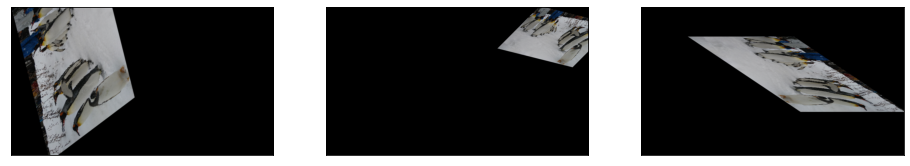

In [30]:
a = [1, 2, 3]
b = [4, -2, -5]
c = [4, 0.5, 2]
d = [-3, 2, 0]

tx = [10, 1400, 1000]
ty = [30, 0, 200]

fig, ax = plt.subplots(1, 3, figsize=(16, 5))

for i in range(3):
    mat = np.array([[a[i], b[i], tx[i]], [c[i], d[i], ty[i]]], dtype=np.float32)
    dst = cv2.warpAffine(img_rgb, mat, (7*width, 7*height))
    ax[i].imshow(dst)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

アフィン変換の特殊な例で、任意の回転と平行移動を組みわせたものを**ユークリッド変換**と呼ぶ。  
対象の大きさを保ったまま、任意に移動するような変換である
$$
    \left[\begin{array}{ccc}
    \cos{\theta}&-\sin{\theta}&t_{x}\\
    \sin{\theta}&\cos{\theta}&t_{y}\\
    0&0&1
    \end{array}\right]
$$

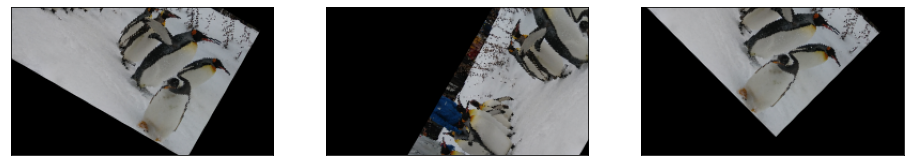

In [36]:
thetas = [np.pi/6, -np.pi/3, np.pi/4]
c = np.cos(thetas)
s = np.sin(thetas)

tx = [20, 70, 50]
ty = [-100, 150, -150]

fig, ax = plt.subplots(1, 3, figsize=(16, 5))

for i in range(3):
    mat = np.array([[c[i], -s[i], tx[i]], [s[i], c[i], ty[i]]], dtype=np.float32)
    dst = cv2.warpAffine(img_rgb, mat, (width, height))
    ax[i].imshow(dst)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

ユークリッド変換に対し、縦横の倍率が等しい拡大・縮小を加えたものを**相似変換**と呼ぶ。
$$
    \left[\begin{array}{ccc}
    s\cos{\theta}&-s\sin{\theta}&t_{x}\\
    s\sin{\theta}&s\cos{\theta}&t_{y}\\
    0&0&1
    \end{array}\right]
$$

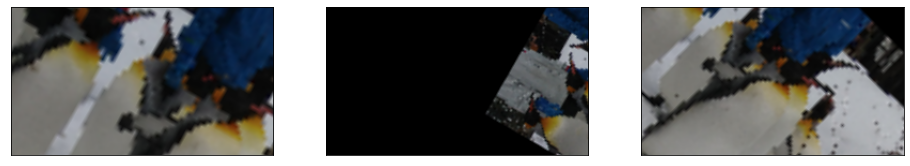

In [39]:
thetas = [np.pi/6, -np.pi/3, np.pi/4]
c = np.cos(thetas)
s = np.sin(thetas)
p = [4, 2, 3]

tx = [20, 150, 50]
ty = [-150, 100, -150]

fig, ax = plt.subplots(1, 3, figsize=(16, 5))

for i in range(3):
    mat = np.array([[p[i]*c[i], -p[i]*s[i], tx[i]], [p[i]*s[i], p[i]*c[i], ty[i]]], dtype=np.float32)
    dst = cv2.warpAffine(img_rgb, mat, (width, height))
    ax[i].imshow(dst)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

## 8-2-4 射影変換
---
同次座標を用いて、さらに一般的な変換を以下の式で表現することもできる。  
この変換を**射影変換（ホモグラフィ）**と呼ぶ。
$$
    \left[\begin{array}{c}
    x'\\
    y'\\
    1
    \end{array}\right] \sim
    \left[\begin{array}{ccc}
    h_{11}&h_{12}&h_{13}\\
    h_{21}&h_{22}&h_{23}\\
    h_{31}&h_{32}&h_{33}
    \end{array}\right]
    \left[\begin{array}{c}
    x\\
    y\\
    1
    \end{array}\right]
$$
これをベクトルと行列の記号を用いて表すと、
$$\boldsymbol{\tilde{x'}}\sim\boldsymbol{H}\boldsymbol{\tilde{x}}$$
ただし、
$$
    \boldsymbol{\tilde{x}}=
    \left[\begin{array}{c}
    x\\
    y\\
    1
    \end{array}\right],
    \boldsymbol{\tilde{x}}'=
    \left[\begin{array}{c}
    x'\\
    y'\\
    1
    \end{array}\right]
$$
$\boldsymbol{H}$は任意の3×3の行列である。  
座標$(x',y')$を求めると、
$$
    x'=\frac{h_{11}x+h_{12}y+h_{13}}{h_{31}x+h_{32}y+h_{33}}\\
    y'=\frac{h_{21}x+h_{22}y+h_{23}}{h_{31}x+h_{32}y+h_{33}}
$$

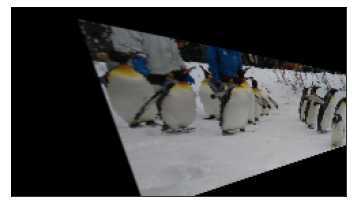

In [41]:
x1 = img_rgb.shape[1]
x2 = img_rgb.shape[0]

pts1 = np.float32([[0,0], [x1,0], [0,x2], [x1,x2]])
pts2 = np.float32([[50,10], [250,50], [100,150], [250,100]])

#M, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)
M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img_rgb, M, (x1, x2))
plt.imshow(dst)
plt.xticks([]);
plt.yticks([]);

## 8-2-5 合成変換
---
線形変換の合成変換の性質は、同次座標を利用した射影変換による合成変換に対しても成り立つ。
$$
    \boldsymbol{\tilde{x}''}\sim(\boldsymbol{H_{2}H_{1}})\boldsymbol{\tilde{x}}
$$

# 8-3 画像の再標本化と補間
## 8-3-1 画像の再標本化
---
ディジタル画像に幾何学的変換を施すと、元の画像の画素位置は、一般に変換後は標本化位置からずれる。  
変換後の画像を再び縦横等間隔に標本化された位置の値の集まりとして表現するために,**再標本化**が必要となる。  
1. 変換後の出力画像におけるある画素位置に対し、適用する幾何学的変換の逆変換を行い、元の入力画像に対する位置を求める。  
2. 上で求めた入力画像での位置は、一般に入力画像の画素位置からずれている。そこで、その位置の値を**補間**により周囲の画素値から求める。  
3. 上の処理を、出力画像上のすべての画素位置に対して行う。

## 8-3-2 ニアレストネイバー
---
求めたい位置に最も近い画素位置の値をそのまま利用する補間法を、**ニアレストネイバー**と呼ぶ。  
求めたい位置を$(x,y)$とすると、その位置の画素値$I(x,y)$は以下のように得られる。
$$
    I(x,y)=f([x+0.5],[y+0.5])
$$
ただし、$f(i,j)$は入力画像の位置$(i,j)$の画素値を、記号[ ]はガウス記号で[ ]内の数字を超えない最大の整数値を返すものである。  
処理が単純で高速であるが、滑らかなエッジがギザギザになって現れるジャギーが発生しやすい。

## 8-3-3 バイリニア補間
---
求めたい位置$(x,y)$の値$I(x,y)$を、まわりの4点の画素値を用い、以下のように求める。
$$
    I(x,y)=
    \left[\begin{array}{cc}
    [x]+1-x&x-[x]
    \end{array}\right]
    \left[\begin{array}{cc}
    f([x],[y])&f([x],[y]+1)\\
    f([x]+1,[y])&f([x]+1,[y]+1)
    \end{array}\right]
    \left[\begin{array}{c}
    [y]+1-y\\
    y-[y]
    \end{array}\right]\\
    =([x]+1-x)([y]+1-y)f([x],[y])+([x]+1-x)(y-[y])f([x],[y]+1)\\
    +([x]-x)([y]+1-y)f([x]+1,[y])+(x-[x])(y-[y])f([x]+1,[y]+1)
$$
これを**バイリニア補間**と呼ぶ。  
まわりの4点の画素値の重み付きの平均値を求めることになるため、平滑化の効果が生じる。  
そのため、ニアレストネイバーのようなジャギーが目立たなくなるが、エッジがなまってしまう傾向がある。

## 8-3-4 バイキュービック補間
---
**バイキュービック補間**では、求めたい位置$(x,y)$の値$I(x,y)$を、まわりの16点の画素値$f_{11},f_{12},\cdots,f_{44}$を用いて、以下の式により求める。
$$
    I(x,y)=
    \left[\begin{array}{cccc}
    h(x_{1})&h(x_{2})&h(x_{3})&h(x_{4})
    \end{array}\right]
    \left[\begin{array}{cccc}
    f_{11}&f_{12}&f_{13}&f_{14}\\
    f_{21}&f_{22}&f_{23}&f_{24}\\
    f_{31}&f_{32}&f_{33}&f_{34}\\
    f_{41}&f_{42}&f_{43}&f_{44}
    \end{array}\right]
    \left[\begin{array}{c}
    h(y_{1})\\
    h(y_{2})\\
    h(y_{3})\\
    h(y_{4})
    \end{array}\right]\\
$$
ただし、
$$
    x_{1}=1+x-[x]\\
    x_{2}=x-[x]\\
    x_{3}=[x]+1-x\\
    x_{4}=[x]+2-x\\
    y_{1}=1+y-[y]\\
    y_{2}=y-[y]\\
    y_{3}=[y]+1-y\\
    y_{4}=[y]+2-y
$$
関数$h(t)$は、sinc関数を3次多項式で近似するもので、一般に以下の式が用いられる。
$$
    h(t)=
    \begin{cases}
        |t|^3-2|t|^2+1 & (|t|\leqq1) \\
        -|t|^3+5|t|^2-8|t|+4 & (1<|t|\leqq2) \\
        0 & (2<|t|)
    \end{cases}
$$
バイリニア補間に比べて、よりシャープで自然な画像が得られる。

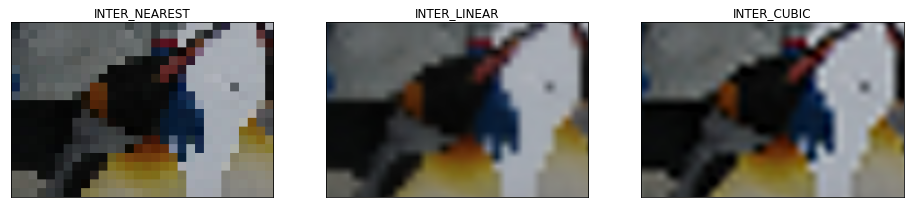

In [55]:
pols = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC]
pol_names = ['INTER_NEAREST', 'INTER_LINEAR', 'INTER_CUBIC']

fig, ax = plt.subplots(1, 3, figsize=(16, 5))
for i in range(3):
    tmp = cv2.resize(img_rgb, dsize=None, fx=10, fy=10, interpolation = pols[i])
    ax[i].imshow(tmp[200:400, 200:500,:])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(pol_names[i])

# 8-4 イメージモザイキング
## 8-4-1 イメージモザイキングとその概略処理手順
---
複数の画像をつなぎ合わせて1つの画像とすることを、**イメージモザイキング**と呼ぶ。  
概略の処理手順は、以下のようになる。
1. 特徴点と検出のマッチング
2. 幾何学的変換の推定
3. 画像の幾何学的変換と合成

## 8-4-2 特徴点の検出とマッチング
---
各入力画像に対し、各々から特徴点を検出する。つぎに、検出された特徴点に対し、画像間で対応を求める。  
このように、画像間で対応を求めることを**マッチング**と呼ぶ。

## 8-4-3 幾何学的変換の推定
---
イメージモザイキングでは射影変換が良く利用される。
$$
    \left[\begin{array}{c}
    x'\\
    y'\\
    1
    \end{array}\right] \sim
    \left[\begin{array}{ccc}
    h_{11}&h_{12}&h_{13}\\
    h_{21}&h_{22}&h_{23}\\
    h_{31}&h_{32}&h_{33}
    \end{array}\right]
    \left[\begin{array}{c}
    x\\
    y\\
    1
    \end{array}\right]
$$
は、定数倍を許した方程式であるため$h_{33}=1$とおき、整理することで以下の式を得ることができる。
$$
    xh_{11}+yh_{12}+h_{13}-xx'h_{31}-x'yh_{32}=x'\\
    xh_{21}+yh_{22}+h_{23}-xy'h_{31}-yy'h_{32}=y'
$$
未知数の数は8個なので、対応する特徴点が4組以上あれば解を得ることができる。  
まず、各対応点から得られる式を以下に示すように並べて行列表現する。
$$
    \boldsymbol{Ah}=\boldsymbol{b}
$$
ここで、
$$
    \boldsymbol{A}=
    \left[\begin{array}{cccccccc}
    x_{1}&y_{1}&1&0&0&0&-x_{1}x'_{1}&-x'_{1}y_{1}\\
    0&0&0&x_{1}&y_{1}&1&-x_{1}y'_{1}&-y_{1}y'_{1}\\
    x_{2}&y_{2}&1&0&0&0&-x_{2}x'_{2}&-x'_{2}y_{2}\\
    0&0&0&x_{2}&y_{2}&1&-x_{2}y'_{2}&-y_{2}y'_{2}\\
    &\vdots&&\vdots&&\vdots&&\vdots&
    \end{array}\right],
    \boldsymbol{h}=
    \left[\begin{array}{c}
    h_{11}\\
    h_{12}\\
    h_{13}\\
    h_{21}\\
    h_{22}\\
    h_{23}\\
    h_{31}\\
    h_{32}
    \end{array}\right],
    \boldsymbol{b}=
    \left[\begin{array}{c}
    x'_{1}\\
    y'_{1}\\
    x'_{2}\\
    y'_{2}\\
    \vdots
    \end{array}\right]
$$
最小二乗解は、以下の式で得られる。
$$
\boldsymbol{h}=(\boldsymbol{A}^{T}\boldsymbol{A})^{-1}\boldsymbol{A}^{T}\boldsymbol{b}
$$
マッチングの結果には、一般には**アウトライヤ**と呼ばれる誤った対応が多数含まれる。  
アウトライヤに影響されずに何らかのパラメータを推定する方法として、**RANSAC(RAndom SAmple Conensus)**と呼ばれる方法がよく利用される。  
RNSACによるパラメータの推定の手順を、以下に述べる。  
1. パラメータを推定するために必要最小限のデータをランダムに選択する。上の場合、4組の対応点を選択する。
2. 選択した4組の対応点座標を用いて、射影変換のパラメータ$h_{11},h_{12},\dots,h_{32}$を求める。
3. 求めた射影変換パラメータを用いて、他の全ての対応点が正しく変換されているかチェックする。  
ここで、正しく変換された対応点は**インライヤ**と呼ばれる。用いたパラメータに対するインライヤの数を記憶する。
4. 1~3の処理を繰り返し、最後に最もインライヤの数が多い射影変換パラメータとそのインライヤを結果として出力する。

In [ ]:
import scipy as sp
import numpy

img1_path = sys.argv[1]
img2_path = sys.argv[2]
 
img1 = cv2.imread(img1_path, cv2.CV_LOAD_IMAGE_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.CV_LOAD_IMAGE_GRAYSCALE)
 
detector = cv2.FeatureDetector_create("SURF")
descriptor = cv2.DescriptorExtractor_create("BRIEF")
matcher = cv2.DescriptorMatcher_create("BruteForce-Hamming")
 
# detect keypoints
kp1 = detector.detect(img1)
kp2 = detector.detect(img2)
 
# descriptors
k1, d1 = descriptor.compute(img1, kp1)
k2, d2 = descriptor.compute(img2, kp2)
 
# match the keypoints
matches = matcher.match(d1, d2)
 
# visualize the matches
dist = [m.distance for m in matches]

# threshold: half the mean
thres_dist = (sum(dist) / len(dist)) * 0.9
 
# keep only the reasonable matches
sel_matches = [m for m in matches if m.distance < thres_dist]
 
point1 = [[k1[m.queryIdx].pt[0], k1[m.queryIdx].pt[1]] for m in sel_matches]
point2 = [[k2[m.trainIdx].pt[0], k2[m.trainIdx].pt[1]] for m in sel_matches]
 
point1 = numpy.array(point1)
point2 = numpy.array(point2)
 
H, Hstatus = cv2.findHomography(point2,point1,cv2.RANSAC)
 
# 移動量を算出
x=0
y=0
cnt=0
for i,v in enumerate(Hstatus):
    if v==1:
        x += point1[i][0]-point2[i][0]
        y += point1[i][1]-point2[i][1]
        cnt += 1

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)
 
x = abs(int(round(x/cnt)))
y = abs(int(round(y/cnt)))
 
# sizeを取得
h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]
 
dst = cv2.warpPerspective(img2,H,(w2+x,h2+y))
 
for i in xrange(w1):
    for j in xrange(h1):
        dst[j,i] = img1[j,i]

## 8-4-4 画像の幾何学的変換と合成
---
画像をつなぎ合わせたとき、画像のつなぎ目が目立ってしまうことがある。  
画像のつなぎ目の位置を適切に選ぶか、重なった部分で両方の画素値を混ぜあわせる方法がある。  
後者の例として、両方の重なった部分でアルファブレンディングの考え方を利用し、画素値を重み付き平均する方法がある。  
例えば、画像1の画素値を$I_{1}$、画像2の画素値を$I_{2}$、画像1の画像端からの距離を$d_{1}$、画像2の画像端からの距離を$d_{2}$とするとき、  
以下の式により、つなぎ目を目立たなくする。
$$
    \frac{d_{1}I_{1}+d_{2}I_{2}}{d_{1}+d_{2}}
$$